<a href="https://colab.research.google.com/github/daipayanhore/ChurnPrediction/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading important packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading csv file
data= pd.read_csv("Churn__Modelling.csv")
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [3]:
df = data[["CreditScore", "Age","Tenure", "Balance","NumOfProducts","EstimatedSalary","Exited"]]
df.columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts","EstimatedSalary","Exited"]
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42.0,2,0.00,1,101348.88,1
1,608,41.0,1,83807.86,1,112542.58,0
2,502,42.0,8,159660.80,3,113931.57,1
3,699,39.0,1,0.00,2,93826.63,0
4,850,43.0,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,42085.58,1
9998,772,42.0,3,75075.31,2,92888.52,1
9999,772,42.0,3,75075.31,2,92888.52,1
10000,792,28.0,4,130142.79,1,38190.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Age              10001 non-null  float64
 2   Tenure           10002 non-null  int64  
 3   Balance          10002 non-null  float64
 4   NumOfProducts    10002 non-null  int64  
 5   EstimatedSalary  10002 non-null  float64
 6   Exited           10002 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.1 KB


In [5]:
df.dropna(subset = ["Age"], inplace = True) #To remove records where there are NULL values in age column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10001 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10001 non-null  int64  
 1   Age              10001 non-null  float64
 2   Tenure           10001 non-null  int64  
 3   Balance          10001 non-null  float64
 4   NumOfProducts    10001 non-null  int64  
 5   EstimatedSalary  10001 non-null  float64
 6   Exited           10001 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 625.1 KB


<ipython-input-5-e1d6e00463f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ["Age"], inplace = True) #To remove records where there are NULL values in age column


In [6]:
x= df.iloc[:,[0,1,2,3,4,5]].values  #Independent variales
y = df.iloc[:,6].values  #Dependent variables

from sklearn.model_selection import train_test_split as tts
x_train,x_test, y_train, y_test = tts(x,y, test_size = 0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
x_strain = SS.fit_transform(x_train)
x_stest = SS.transform(x_test)

from sklearn.linear_model import LogisticRegression
LRO= LogisticRegression()
LRO.fit(x_strain,y_train)
y_predtrain = LRO.predict(x_strain)
y_predtest= LRO.predict(x_stest)

In [7]:
#Confusion Matrix for training data
#6126+98= 6224 data records predicted correctly out of 8000 records
from sklearn.metrics import confusion_matrix
cmtrain= confusion_matrix(y_train, y_predtrain)
cmtrain

array([[6126,  232],
       [1544,   98]])

In [8]:
#Confusion Matrix for test data
#1554+21= 1575 data predicted correctly out of 2001 records
from sklearn.metrics import confusion_matrix
cmtest= confusion_matrix(y_test, y_predtest)
cmtest

array([[1554,   51],
       [ 375,   21]])

In [9]:
#Getting output for a random input
#CreditScore= 700, Age=43, Tenure= 1, Bank balance = 87695, Number of Products used= 2, EstimatedSalary= 124000
LRO.predict([[700, 43, 1, 87695, 2, 124000]])

#Output significance: Customer has exited

array([1])

In [22]:
#Finding the intercepts and coefficients for the logistic regression model
intercept= LRO.intercept_[0]
print(intercept)
coefficients= LRO.coef_
print(coefficients)
x1,x2,x3,x4,x5,x6= LRO.coef_[0][0], LRO.coef_[0][1],LRO.coef_[0][2],LRO.coef_[0][3],LRO.coef_[0][4],LRO.coef_[0][5]
print(x1,x2,x3,x4,x5,x6)

-1.4978036322907
[[-0.08247434  0.64735203 -0.03271789  0.30067621 -0.03081804  0.05362103]]
-0.08247434323531744 0.6473520304248955 -0.032717894965239115 0.3006762110077858 -0.030818042533146073 0.05362103462301736


In [37]:
import math

#Creating functions to label each row of record as 0 or 1
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

results = []
wt_sum= []
outputforgraph=[]
def eqn(list1):
  left=0
  stay=0
  for sublist in list1:
    weighted_sum = intercept + np.dot(sublist, coefficients[0])
    output = sigmoid(weighted_sum)
    outputforgraph.append(output)
    wt_sum.append(weighted_sum)
    if(output>=0.5):
      left= left+1
    else:
      stay=stay+1
    results.append(1 if output>=0.5 else 0)
  print(results)
  print(stay," stayed")
  print(left," left")
eqn(x_strain)
eqn(x_stest)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

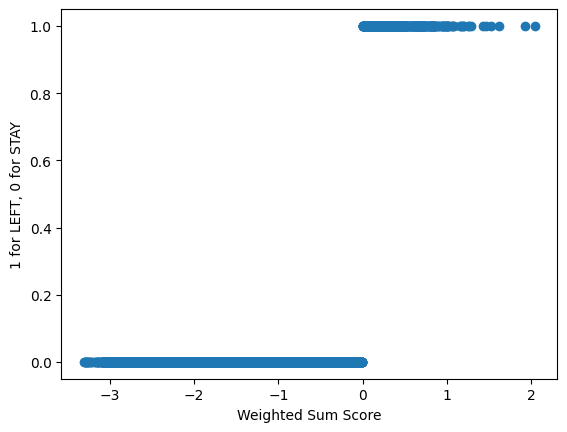

In [42]:
#Plotting
plt.scatter(wt_sum, results)
plt.ylabel("1 for LEFT, 0 for STAY")
plt.xlabel("Weighted Sum Score")
plt.show()